In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as seasonal_decompose

In [23]:
# Leer los datos de sismos
df = pd.read_csv('sismicidad_historica_1.csv', encoding='latin-1')
print(df.head())
print(df.describe())
print(df.info())

   No       Fecha Hora local  Epicentro Latitud  Epicentro Longitud  \
0   1  1644/01/16      05:00               7.37              -72.64   
1   2  1644/03/16      12:00               4.46              -74.04   
2   3  1646/04/03      02:00               5.52              -74.13   
3   4  1736/02/02      09:00               2.50              -76.50   
4   5  1743/10/18      10:45               4.44              -73.83   

                                    Autor Epicentro  Magnitud Magnitud Tipo  \
0                     Servicio Geológico Colombiano       6.5            MW   
1  Dimat&eacute, C.. Rivera L.. Cisternas A. (2005)       5.5            MW   
2                     Servicio Geológico Colombiano       6.0            MW   
3                     Servicio Geológico Colombiano       6.0            MW   
4                     Servicio Geológico Colombiano       6.2            MW   

                  Autor Magnitud  Profundidad              Autor Profundidad  \
0  Servicio Geológ

In [24]:
# Generar datos
dates = df['Fecha']
values = df['Magnitud']
ts = pd.Series(values.values, index=dates)
print(dates)
print(values)
print(ts)

0     1644/01/16
1     1644/03/16
2     1646/04/03
3     1736/02/02
4     1743/10/18
         ...    
78    2014/10/20
79    2015/03/10
80    2016/10/30
81    2020/04/15
82    2023/08/17
Name: Fecha, Length: 83, dtype: object
0     6.5
1     5.5
2     6.0
3     6.0
4     6.2
     ... 
78    5.8
79    6.4
80    5.3
81    5.8
82    6.1
Name: Magnitud, Length: 83, dtype: float64
Fecha
1644/01/16    6.5
1644/03/16    5.5
1646/04/03    6.0
1736/02/02    6.0
1743/10/18    6.2
             ... 
2014/10/20    5.8
2015/03/10    6.4
2016/10/30    5.3
2020/04/15    5.8
2023/08/17    6.1
Length: 83, dtype: float64


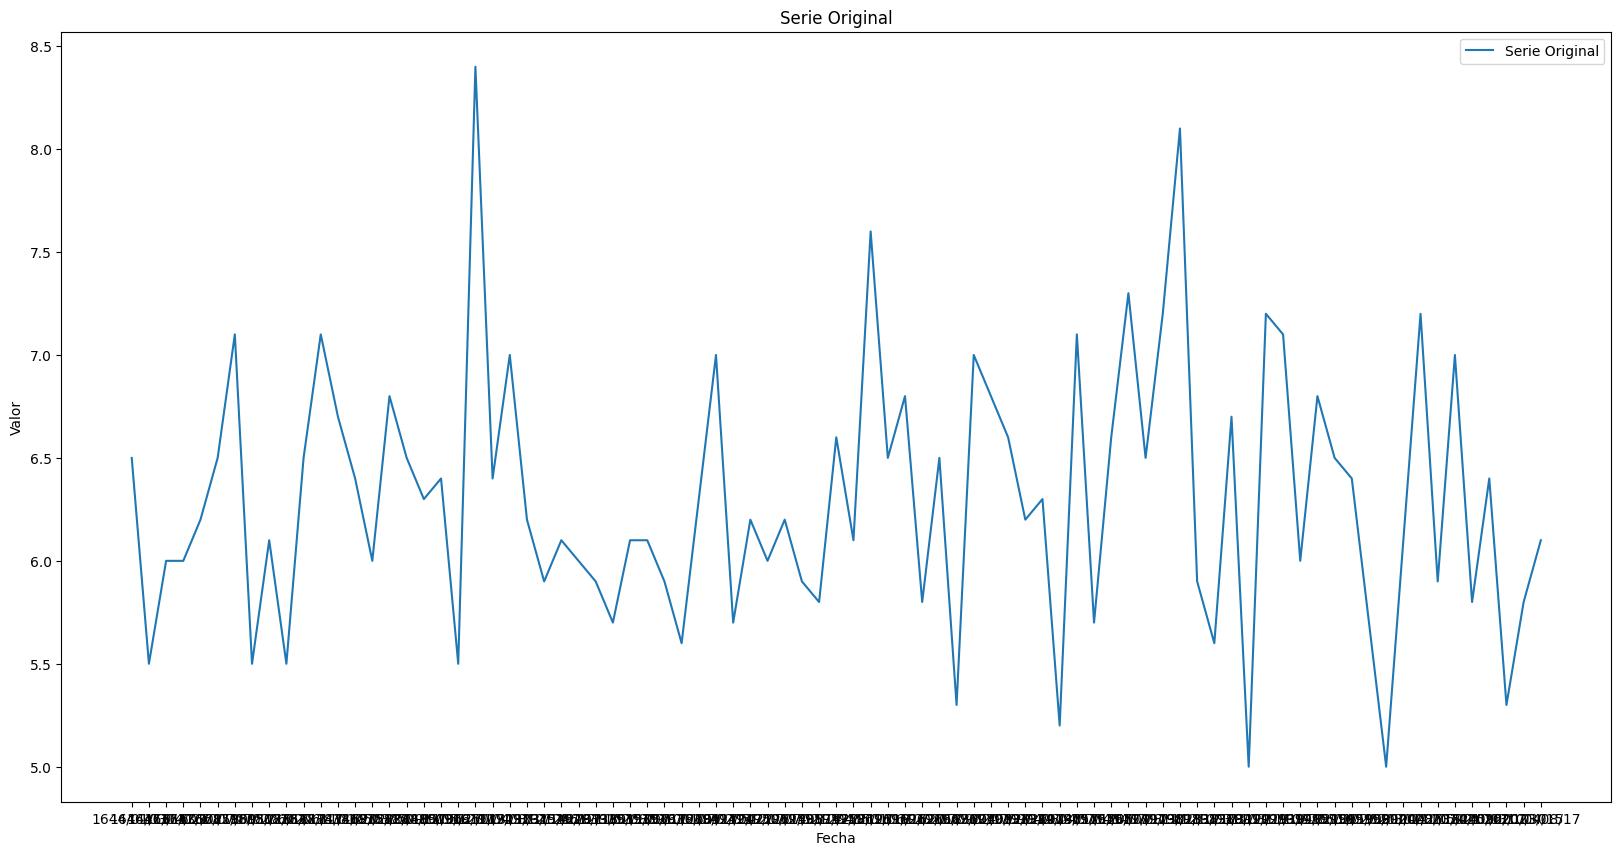

In [25]:
# Gráfica de la serie original
plt.figure(figsize=(20, 10))
plt.plot(ts, label='Serie Original')
plt.title('Serie Original')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [26]:
# Descomposición de la serie de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Fecha' column to datetime if it's not already, handling errors
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Fecha'])

# Set 'Fecha' as index
ts = pd.Series(df['Magnitud'].values, index=df['Fecha'])

# Try to infer the frequency (replace 'D' with the appropriate frequency if known)
ts = ts.asfreq(pd.infer_freq(ts.index))

# Handle missing values (choose one of the methods)
# 1. Fill with a specific value:
# ts = ts.fillna(0)  # Replace NaN with 0, adjust as needed

# 2. Forward fill:
# ts = ts.ffill()

# 3. Interpolate linearly:
ts = ts.interpolate()

# If frequency cannot be inferred, specify the period manually
decomposition = seasonal_decompose(ts, model='additive', period=7)

<ipython-input-26-1ba0caf5c477>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')


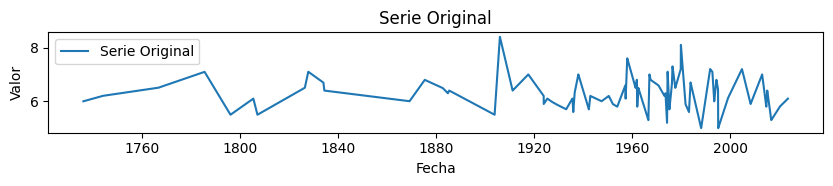

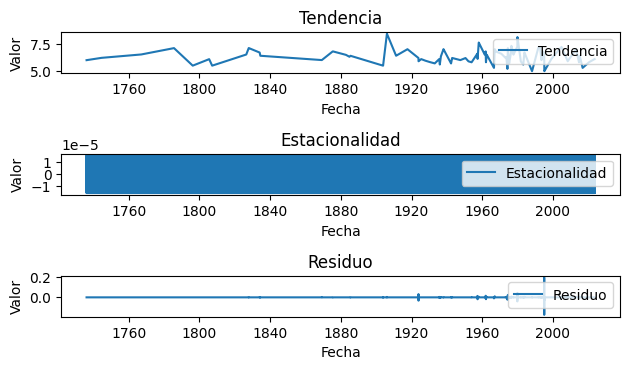

In [27]:
# Gráfica de la serie original
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.title('Serie Original')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Gráfica de tendencia
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.title('Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Gráfica de estacionalidad
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.title('Estacionalidad')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Gráfica de residuo
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuo')
plt.title('Residuo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()

Realizar un análisis e interpretación de los resultados obtenidosdespués de la descomposición.